In [1]:
import torch
import numpy as np
from model import ensemble, efficienet_pool
import torch
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
import skimage.io
from main import softmax
from tqdm.notebook import tqdm
import zipfile
import numpy as np
import torchvision.models as models
import torch.nn as nn
import pickle


In [2]:
model_ensemble = pickle.load(open('./ensemble.obj','rb'))
model_ensemble.eval()

ensemble(
  (model1): efficienet_pool(
    (model): EfficientNet(
      (features): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 56, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(56, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): Sequential(
          (0): MBConv(
            (block): Sequential(
              (0): Conv2dNormActivation(
                (0): Conv2d(56, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=56, bias=False)
                (1): BatchNorm2d(56, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(56, 14, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(14, 56, kernel_size=(1, 1), stride=(1, 1))
   

In [3]:
labels = pickle.load(open('./labels.obj','rb'))

In [4]:
results = pickle.load(open('./results.obj','rb'))

In [5]:
def plot_images(img_patches):
    # plot 4x4 grid of images
    fig, ax = plt.subplots(4, 4, figsize=(10, 10))
    for i in range(4):
        for j in range(4):
            ax[i, j].imshow(img_patches[i*4+j].reshape(128, 128, 3))
            ax[i, j].axis('off')
    plt.show()


def inference(i):
    with torch.no_grad():
        print("Image patches")
        img_res = [results[i][j]['img'] for j in range(len(results[i]))]
        
        plot_images(img_res)
        
        print("True labels", labels[i])
        img_res = torch.tensor(np.array(img_res)).view((len(results[i]),3,128,128))

        soft_ = softmax(model_ensemble(img_res.float()))
        print("Predicted probability distribution", soft_)
        print("Predicted label by our ensemble model", torch.argmax(soft_, dim=1).item())
        return torch.argmax(soft_, dim=1).item()

Image patches


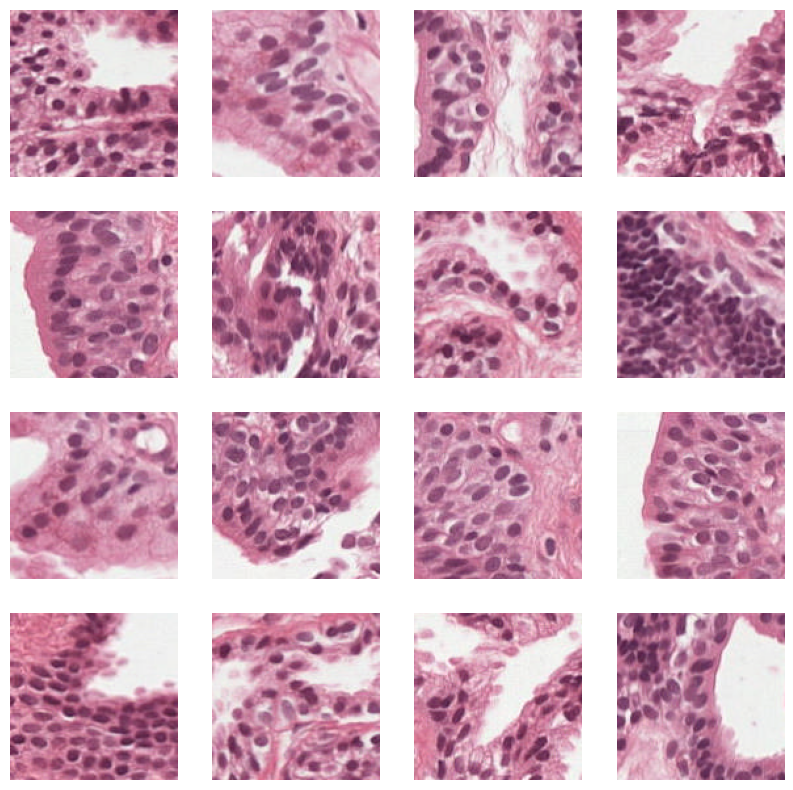

True labels 0
Predicted probability distribution tensor([[3.5978e-01, 2.7911e-01, 4.9073e-06, 5.0838e-03, 3.5595e-01, 6.9306e-05]])
Predicted label by our ensemble model 0


0

In [6]:
inference(0)

Image patches


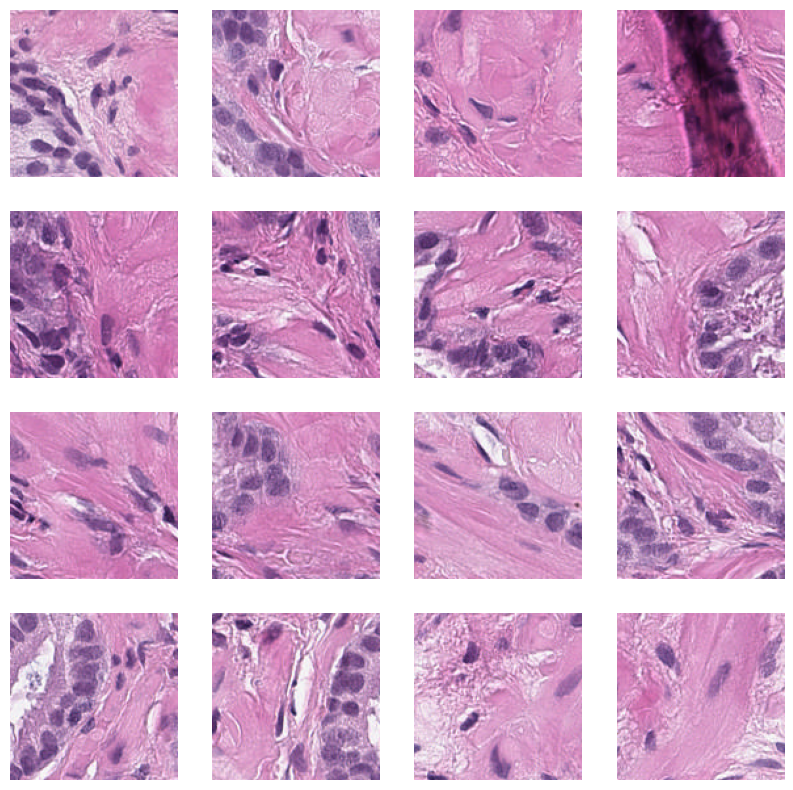

True labels 1
Predicted probability distribution tensor([[0.2588, 0.3039, 0.3640, 0.0020, 0.0288, 0.0425]])
Predicted label by our ensemble model 2


2

In [7]:
inference(45)

Image patches


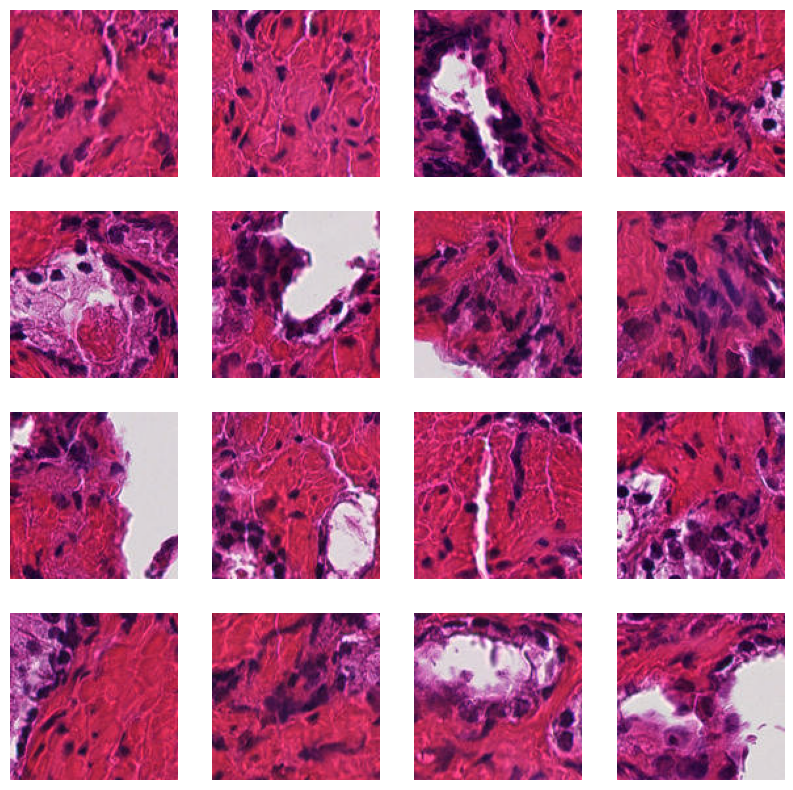

True labels 2
Predicted probability distribution tensor([[0.0348, 0.2647, 0.3396, 0.2852, 0.0461, 0.0296]])
Predicted label by our ensemble model 2


2

In [8]:
inference(73)

Image patches


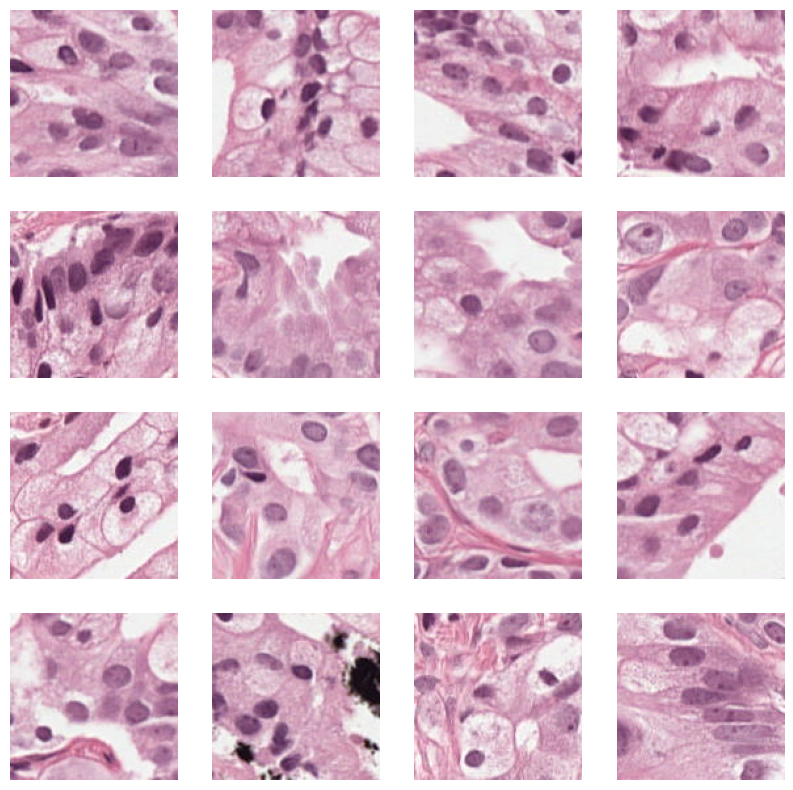

True labels 3
Predicted probability distribution tensor([[5.2410e-03, 3.2752e-08, 3.1813e-01, 4.3678e-01, 2.3496e-01, 4.8865e-03]])
Predicted label by our ensemble model 3


3

In [9]:
inference(100)

Image patches


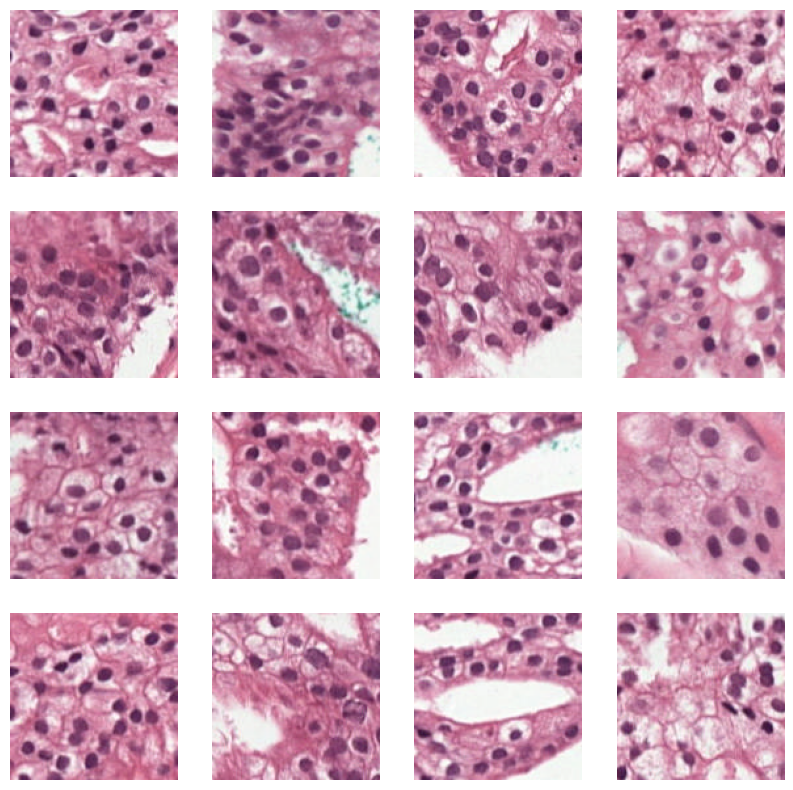

True labels 4
Predicted probability distribution tensor([[2.8824e-04, 6.1256e-09, 7.2715e-06, 3.4662e-01, 3.6827e-01, 2.8482e-01]])
Predicted label by our ensemble model 4


4

In [10]:
inference(130)

Image patches


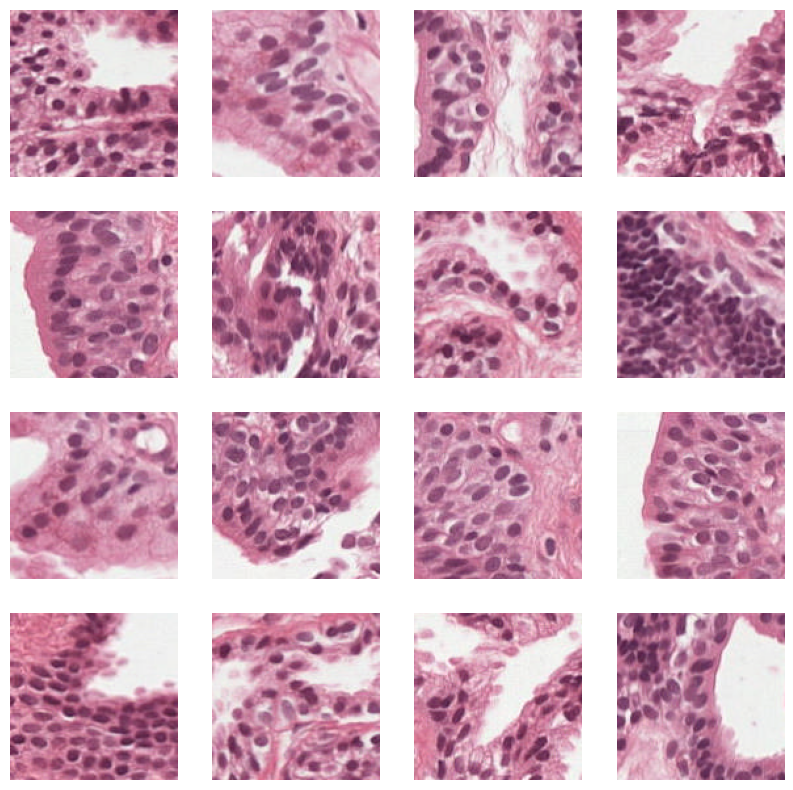

True labels 0
Predicted probability distribution tensor([[3.5978e-01, 2.7911e-01, 4.9073e-06, 5.0838e-03, 3.5595e-01, 6.9306e-05]])
Predicted label by our ensemble model 0


0

In [11]:
inference(0)

Image patches


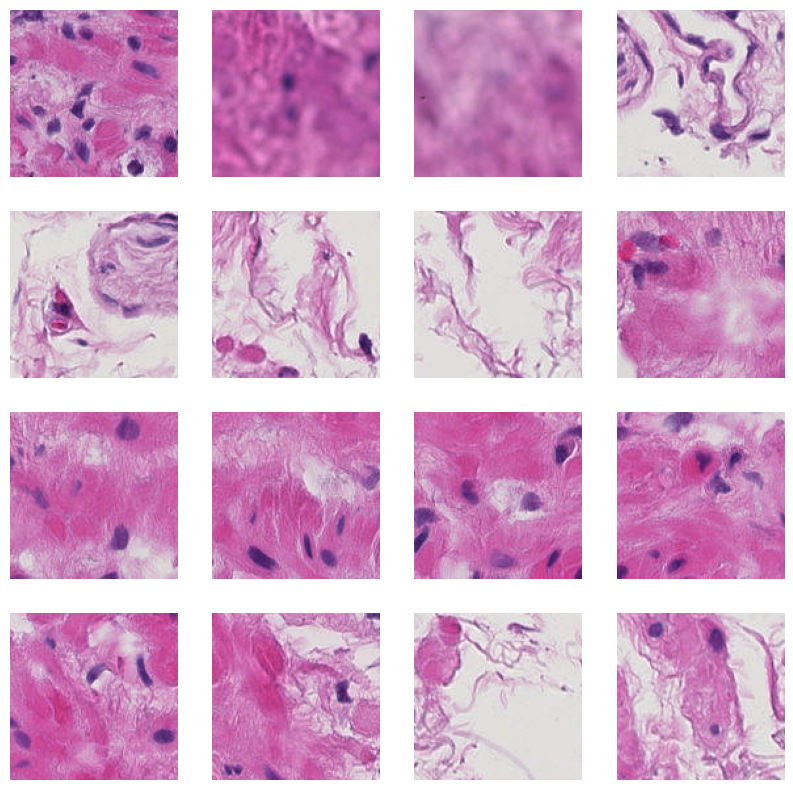

True labels 0
Predicted probability distribution tensor([[5.7991e-01, 2.7566e-01, 1.1111e-05, 8.1607e-02, 6.1633e-02, 1.1752e-03]])
Predicted label by our ensemble model 0


0

In [12]:
inference(4)